### Modelo Clasificacion SVM (support vector machine) Kernel Radial 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df=pd.read_csv(r'C:\Users\carolina\Desktop\FormDataAnalyst\Modelos\clasificacion_svm_lineal.csv')

In [28]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [29]:
df.shape

(400, 3)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [31]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


TENGO YA COMPROBADA LA RELACION DE EDAD Y SALARIO CON LA VARIABLE OBJETIVO COMPRA. PROCEDEMOS A LA ELABORACION DE MODELO.

#### Dummys y Missing no hay

In [32]:
df.isnull().value_counts()

Age    EstimatedSalary  Purchased
False  False            False        400
dtype: int64

#### Seleccion de variables

Utilizaremos las dos variables (edad y salario)

In [33]:
y=df.iloc[:,2].values

In [34]:
x=df.iloc[:,[0,1]].values

#### Separacion training/test

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1987)

#### Normalizacion/estandarizacion en este modelo SI que hay que hacerlo.

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

#### Crear el modelo SVC para kernel radial

* Parametros:
    - C: valor de regularizacion
    - kernel: linear, poly, rbf, sigmoid, precomputed. 
    - degree: grado del polinomio en caso de polinomio. Por defecto 3.
    - gamma: para radial y sigmoidal para regularizar el valor. Suele ser 1/numero de caracteriticas.
    - coef0: es un valor para el sigmoide. Por default 0.0. En el exponente de 1/1+e^-y para inclinar hacia un lado u otro.
    - probability: si quiero la probabilidad en booleano. Por defecto False.

In [17]:
from sklearn.svm import SVC   # de super vector machine, super vector clasified

In [54]:
clasificador=SVC(C=1.0, kernel='rbf', gamma='auto', coef0=0.0, verbose=True,  random_state=1987)
clasificador.fit(x_train,y_train)

[LibSVM]

SVC(gamma='auto', random_state=1987, verbose=True)

#### Prediccion

In [55]:
clasificador.predict(x_test)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

##### Evaluacion del modelo mediante matriz de confusion o contingencia

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
matriz_conf=confusion_matrix(y_test, clasificador.predict(x_test))
matriz_conf  # Total 120 (400*0.3)

array([[68,  7],
       [ 4, 41]], dtype=int64)

In [58]:
# Metricas de la matriz

## Funcion de evaluacion
def Evaluacion_ClasificacionRL(matriz_conting):
    precision_precision=matriz_conf[0,0]/(matriz_conf[0,0]+matriz_conf[0,1])
    accuracy_exactitud=(matriz_conf[0,0]+matriz_conf[1,1])/matriz_conf.sum()
    specifity_especificidad=matriz_conf[1,1]/(matriz_conf[1,1]+matriz_conf[0,1])
    recall_sensibilidad=matriz_conf[0,0]/(matriz_conf[0,0]+matriz_conf[1,0])
    f1_score=2*precision_precision*recall_sensibilidad/(precision_precision+recall_sensibilidad)
    print(f"Precision: {precision_precision:.2f}\nExactitud: {accuracy_exactitud:.2f}\nEspecificidad: {specifity_especificidad:.2f}\nSensibilidad: {recall_sensibilidad:.2f}\nPuntuación F1: {f1_score:.2f}")
    

In [59]:
Evaluacion_ClasificacionRL(matriz_conf)

Precision: 0.91
Exactitud: 0.91
Especificidad: 0.85
Sensibilidad: 0.94
Puntuación F1: 0.93


#### Visualizacion del Modelo

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


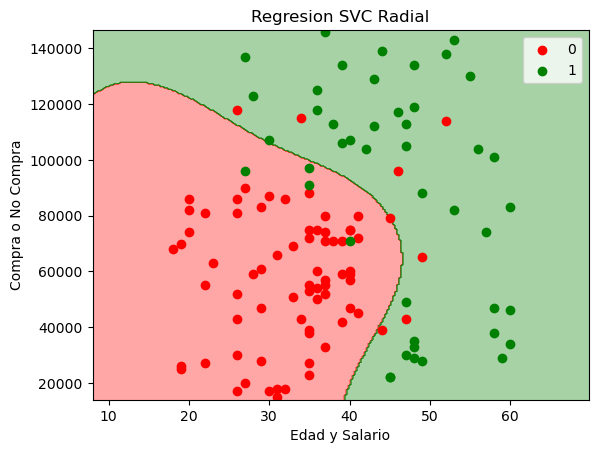

In [60]:
from matplotlib.colors import ListedColormap 
x_set, y_set = sc_x.inverse_transform(x_test), y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-10, stop = x_set[:,0].max()+10, step=0.25), np.arange(start=x_set[:,1].min()-1000, stop=x_set[:,1].max()+1000, step=500)) # coord x e y
plt.contourf(x1,x2,clasificador.predict(sc_x.transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),alpha=0.35,cmap=ListedColormap(('red','green'))) # ravel() aplana la matriz
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1], c = ListedColormap(('red','green'))(i),label=j)
plt.title('Regresion SVC Radial')
plt.xlabel('Edad y Salario')
plt.ylabel('Compra o No Compra')
plt.legend()
plt.show()

Lo que se visualiza son los datos de la regresion. 

* Primer modelo 

clasificador=SVC(C=1.0, kernel='rbf', gamma='scale', coef0=0.0, verbose=True,  random_state=1987)

A la derecha son los que clasifico como 1 cuando en realidad eran 0 o sea FP (son 7).

A la izquierda son los que clasifico como 0 cuando en realidad eran 1 o sea FN (son 4).

* Segundo modelo

clasificador=SVC(C=2.0, kernel='rbf', gamma=0.5, coef0=0.0, verbose=True,  random_state=1987)

* Tercer modelo

clasificador=SVC(C=1.0, kernel='rbf', gamma='auto', coef0=0.0, verbose=True,  random_state=1987)